## Importing Essential Libraries, Filterning Warnings, and Reading the Data File

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'E:\Learning Data Science With Python\Data Science 104 - Machine Learning Models\Data Science 104 - Linear Regression\Student_Performance.csv')

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## Checking the DataTypes, Checking for Null Values, Duplicate Values, and doing Basic Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [9]:
df.duplicated().sum()

127

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(9873, 6)

## Multiple Linear Regression

* From our dataset, we can observe that we have a total of 9873 rows, with 6 columns. 
* Among these columns, 'Extracurricular Activities' is an object dtype as it is a category {Yes / No}. (str)
* We first need to convert it into a numeric value for the model to understand.
* We can do this in multiple ways like pd.get_dummies function, LabelEncoder from sklearn, OneHotEncoding from sklearn, etc.
* We will use pd.get_dummies in this particular example.

In [22]:
df = pd.get_dummies(df, columns = ['Extracurricular Activities'])

In [23]:
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,91.0,False,True
1,4,82,4,2,65.0,True,False
2,8,51,7,2,45.0,False,True
3,5,52,5,2,36.0,False,True
4,7,75,8,5,66.0,True,False


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Sleep Hours                       9873 non-null   int64  
 3   Sample Question Papers Practiced  9873 non-null   int64  
 4   Performance Index                 9873 non-null   float64
 5   Extracurricular Activities_No     9873 non-null   bool   
 6   Extracurricular Activities_Yes    9873 non-null   bool   
dtypes: bool(2), float64(1), int64(4)
memory usage: 482.1 KB


* Now that we have our data prepared for regression, we will split the training and the testing data for convenience. 
* Splitting the training data allows us to train the model on a specific percentage of the data, and we can test the trained model on the test split.
* This allows us to check the model accuracy and decide whether we should use our model for real world predictions.
* We will use the train_test_split module from sklearn for this.
* We will first remove the dependent variable from the dataframe and assign it to the Y variable.
* The remaining independent variables will be assigned to the X variable.

In [26]:
x = df.drop('Performance Index', axis=1)
y = df['Performance Index']

print(x)
print(y)

      Hours Studied  Previous Scores  Sleep Hours  \
0                 7               99            9   
1                 4               82            4   
2                 8               51            7   
3                 5               52            5   
4                 7               75            8   
...             ...              ...          ...   
9995              1               49            4   
9996              7               64            8   
9997              6               83            8   
9998              9               97            7   
9999              7               74            8   

      Sample Question Papers Practiced  Extracurricular Activities_No  \
0                                    1                          False   
1                                    2                           True   
2                                    2                          False   
3                                    2                          False  

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=36)

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7898, 6)
(1975, 6)
(7898,)
(1975,)


* Now that we have split the data, we will proceed to build our model.

In [30]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [36]:
predictions = reg.predict(x_test)

In [34]:
reg.coef_

array([ 2.85497943,  1.0186039 ,  0.47049324,  0.19005112, -0.29777035,
        0.29777035])

In [35]:
reg.intercept_

-33.712449826496325

In [39]:
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print("R-Squared = ", r2)
print("Mean Absolute Error = ", mae)
print("Mean Squared Error = ", mse)

R-Squared =  0.9884793610696265
Mean Absolute Error =  1.6129850167248578
Mean Squared Error =  4.131024518770263


### Insights

* From the above scores, we can interpret the the R-Squared a.k.a (Prediction Accuracy - {in this particular ML model}) is 98.84% which is a very high number.
* The Mean Absolute Error is 1.61
* The Mean Squared Error is 4.13

## Visualizing the Model

In [47]:
y_test.head()

6837    43.0
315     33.0
6130    49.0
6278    40.0
6808    43.0
Name: Performance Index, dtype: float64

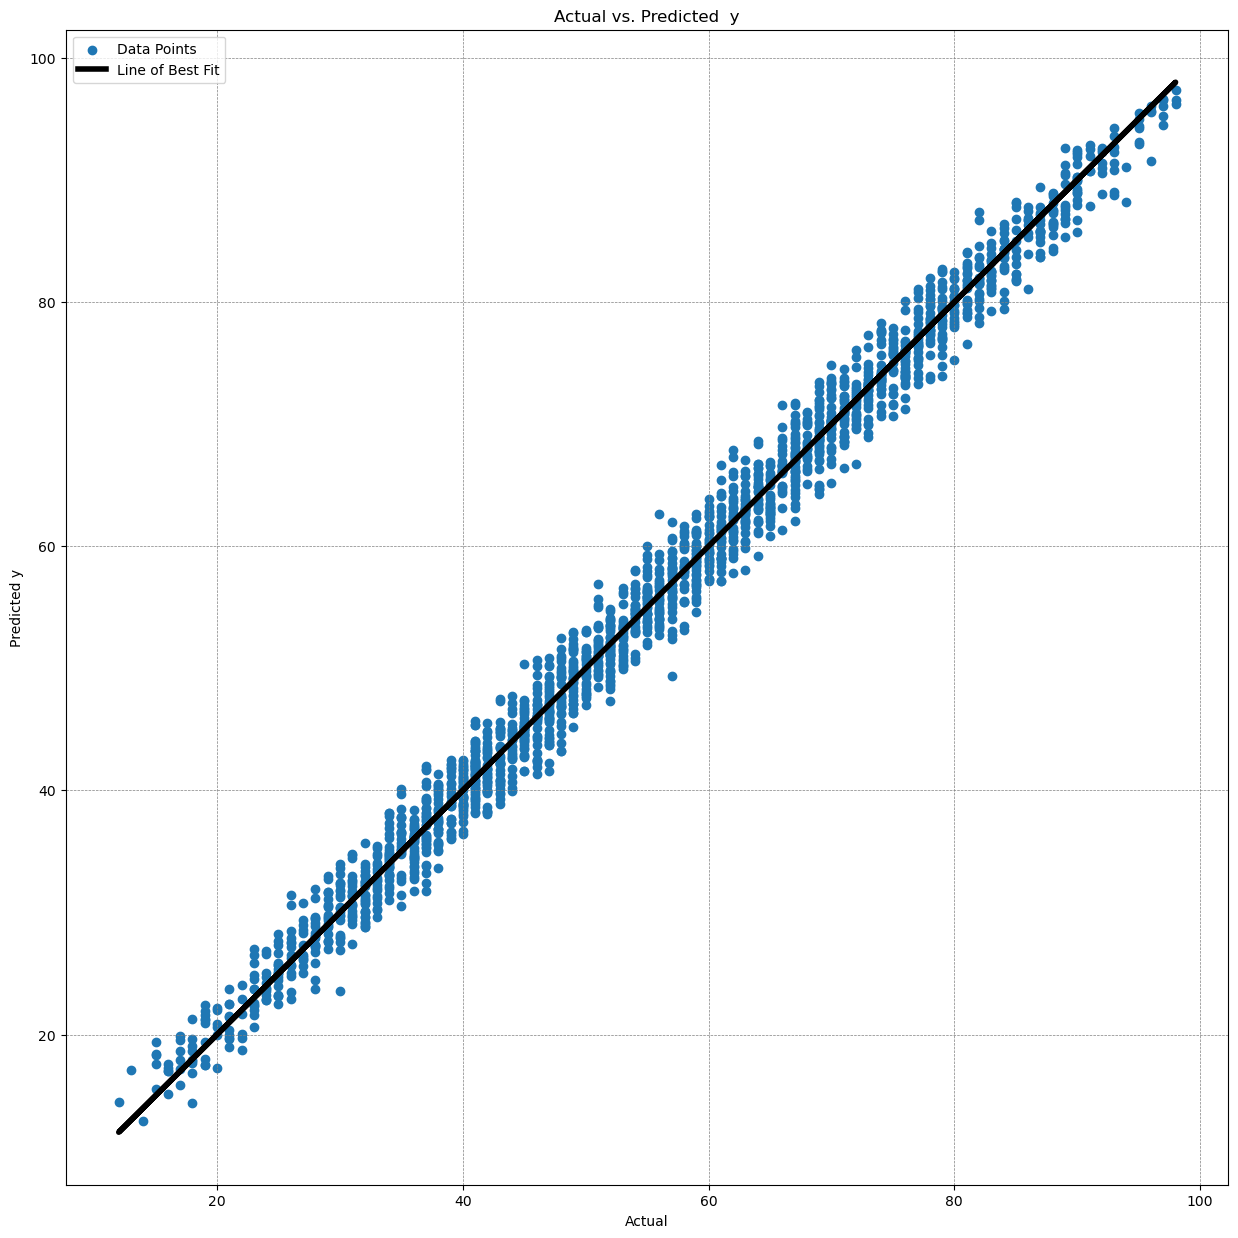

In [52]:
plt.figure(figsize=(15, 15)) 
plt.scatter(y_test, predictions, label='Data Points')
plt.plot(y_test, y_test, color='black',linewidth=4, label='Line of Best Fit')
plt.xlabel('Actual')
plt.ylabel('Predicted y')
plt.title('Actual vs. Predicted  y')

plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.legend()
plt.show()